In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
# 训练集
#       2104  5  1  45             460
# x =   1416  3  2  40       y =   232
#        852  2  1  35             178
X_train = np.array([[2104, 5, 1, 45], 
                    [1416, 3, 2, 40], 
                    [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [130]:
# 损失函数
def function_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b          
        cost = cost + (f_wb_i - y[i])**2      
    cost = cost / (2 * m)                     
    return cost

In [131]:
# 计算偏导数
def function_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,)) # 一行n列
    dj_db = 0.
    
    for i in range(m):
        error = np.dot(X[i], w) + b - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * X[i, j]
        dj_db = dj_db + error
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [132]:
def gradient_descent(X, y, w_star, b_star, alpha, iterations, cost_function, gradient_function):
    # 如果x为空，结束
    m = X.shape[0]
    if m == 0:
        return 0
    
    j_history = []
    w = w_star
    b = b_star
    
    for i in range(iterations):
        cost = cost_function(X, y, w, b)
        dj_w, dj_b = gradient_function(X, y, w, b)
        
        j_history.append(cost)
        w = w - alpha * dj_w
        b = b - alpha * dj_b
        
    return w, b, j_history

In [133]:
# 不使用归一化
w_in = np.zeros(4)
b_in = 0.
iterations = 1000
alpha = 8e-7

w_final, b_final, j_hist = gradient_descent(X_train, y_train, w_in, b_in,alpha, iterations,
                                                    function_cost, function_gradient)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: -0.00,[ 0.21  0.01 -0.02 -0.11] 
prediction: 426.53, target value: 460
prediction: 285.99, target value: 232
prediction: 170.91, target value: 178


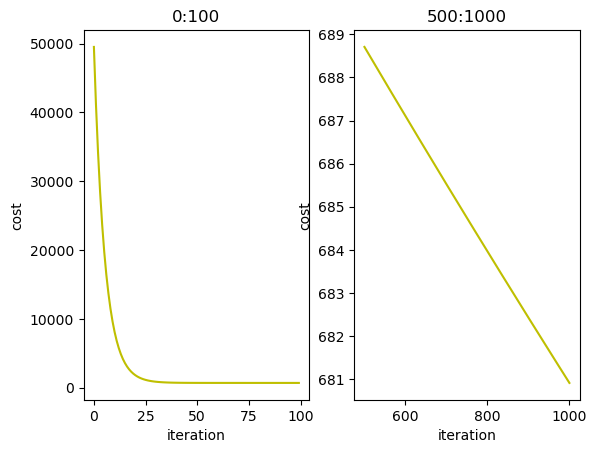

In [134]:
# 绘图
iteration = np.linspace(0, iterations, iterations)
plt.subplot(1, 2, 1)
plt.plot(iteration[0:100], j_hist[0:100], color = 'y')
plt.title("0:100")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.subplot(1, 2, 2)
plt.plot(iteration[500:1000], j_hist[500:1000], color = 'y')
plt.title("500:1000")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [135]:
# 归一化
def Zscore_Normalization(X):
    x_mean = np.mean(X, axis=0)
    x_sigma = np.std(X, axis=0)
    x_norm = (X - x_mean) / x_sigma
    
    return x_norm

In [136]:
w_in = np.zeros(4)
b_in = 0.
iterations = 1000
alpha = 8e-2

# 归一化
X_norm = Zscore_Normalization(X_train)

w_final, b_final, j_hist = gradient_descent(X_norm, y_train, w_in, b_in,alpha, iterations,
                                                    function_cost, function_gradient)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: 290.00,[ 38.05  41.54 -30.99  36.34] 
prediction: 460.00, target value: 460
prediction: 232.00, target value: 232
prediction: 178.00, target value: 178


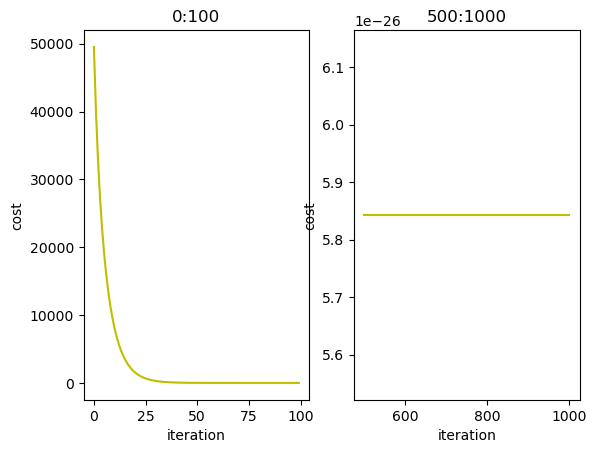

In [137]:
# 绘图
iteration = np.linspace(0, iterations, iterations)
plt.subplot(1, 2, 1)
plt.plot(iteration[0:100], j_hist[0:100], color = 'y')
plt.title("0:100")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.subplot(1, 2, 2)
plt.plot(iteration[500:1000], j_hist[500:1000], color = 'y')
plt.title("500:1000")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()